In [47]:
import MDAnalysis
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
import math
import os
import sys
import statistics
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from pylab import *
from tqdm import tqdm


In [48]:
image_folder = '/scr/aldea/kgutenbrunner/github/MA/MD/MBFV/img'

## basepair distance

In [49]:
def get_pairwise_distances(dcd_file, pdb_file, movie_skip):
    u = MDAnalysis.Universe(pdb_file, dcd_file)
    selection = u.select_atoms("record_type ATOM")
    pairwise_distances = []

    for t, ts in enumerate(u.trajectory):
        if t % movie_skip != 0:
            continue
        t = int(t/movie_skip)
        pairwise_distances.append([])
        positions = selection.center(None, compound="residues")

        for i, pos_i in enumerate(positions):
            pairwise_distances[t].append([])
            for j, pos_j in enumerate(positions):
                if i > j:
                    pairwise_distances[t][i].append(pairwise_distances[t][j][i])
                else:
                    pairwise_distances[t][i].append(np.linalg.norm(pos_j-pos_i))

    return pairwise_distances


In [50]:
def get_bp_distance(dcd_file, pdb_file, movie_skip, bp):
    u = MDAnalysis.Universe(pdb_file, dcd_file)
    selection = u.select_atoms("record_type ATOM")
    distances = []

    for t, ts in enumerate(u.trajectory):
        if t % movie_skip != 0:
            continue
        t = int(t/movie_skip)
        positions = selection.center(None, compound="residues")
        pos_i = positions[bp[0]]
        pos_j = positions[bp[1]]
        distances.append(np.linalg.norm(pos_j-pos_i))

    return distances


In [51]:
def remove_comments(lines):
    cleaned = [line for line in lines if line[0].isnumeric()]
    return cleaned

def get_steps(foldername, gradient):
    outLines = []
    inF = open(f"{foldername}/out{gradient}_1_1.txt", 'r')

    outLines.append("Step ")
    lines = remove_comments(inF.readlines())

    start = int(lines[0][0:lines[0].find(',')])
    step = int(lines[1][0:lines[1].find(',')]) - int(lines[0][0:lines[0].find(',')])
    inF.close()

    return start, step


def calculate_endforce(foldername, distances, ):
    end_force = ((len(distances)*movie_skip*step_interval*2)/1000000000) * gradient
    return end_force

# PK2 low vs. high energy

## Low Energy

In [52]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/MBFV/normal_constr/'
foldername = os.path.join(base_folder, 'run1000_1/')
gradient = 1000

movie_skip = 50

basedir = os.getcwd()

dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
pdb_file = base_folder + 'init.pdb'


step_start, step_interval = get_steps(foldername, gradient)


In [53]:
base_folder = '/scr/aldea/kgutenbrunner/github/MA/MD/MBFV/positive_pk2_energy/'
distances_file = os.path.join(base_folder, 'pk2_distance.txt')

distances_pk2 = {}
with open(distances_file, 'r') as f:
    distances = None
    simulation = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_pk2[simulation] = distances
            simulation=int(line[1:-1]) +1
            distances=[]

del distances_pk2[None]
distances_pk2[simulation] = distances
force=line


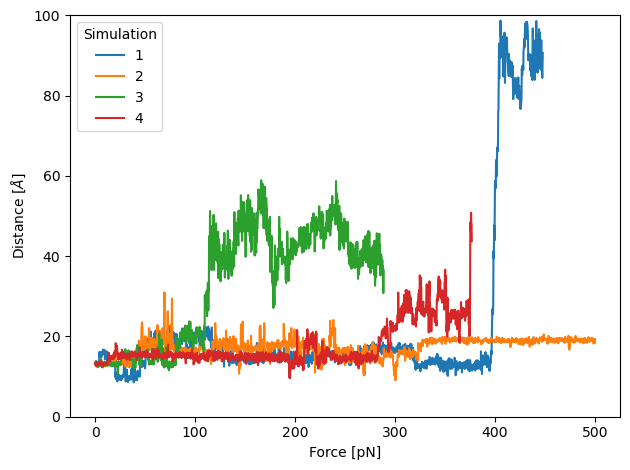

In [54]:
for key,distance in distances_pk2.items():
    end_force = ((len(distance)*movie_skip*step_interval*2)/1000000000) * gradient
    plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:], label=key)
    #plt.plot(np.linspace(start=0, stop=end_force, num=len(distances[1:])), distances[1:], label=key)

plt.legend(title='Simulation', loc=0)
#plt.title(f'Pseudo Knot 2 Distance during MD simulations', fontsize=14)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')
plt.ylim(0, 100)


save_under = os.path.join(image_folder, 'positive_pk2_distance.png')
plt.tight_layout()

plt.savefig(save_under)

## High Energy

In [55]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/MBFV/normal_const_pk2_lowenergy_grad/'
foldername = os.path.join(base_folder, 'run1000_1/')
gradient = 1000

movie_skip = 50

basedir = os.getcwd()

dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
pdb_file = base_folder + 'init.pdb'


step_start, step_interval = get_steps(foldername, gradient)


In [56]:
base_folder = '/scr/aldea/kgutenbrunner/github/MA/MD/MBFV/negative_pk2_energy/'
distances_file = os.path.join(base_folder, 'pk2_distance.txt')

distances_pk2 = {}
with open(distances_file, 'r') as f:
    distances = None
    simulation = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_pk2[simulation] = distances
            simulation=int(line[1:-1]) +1
            distances=[]

del distances_pk2[None]
distances_pk2[simulation] = distances
force=line


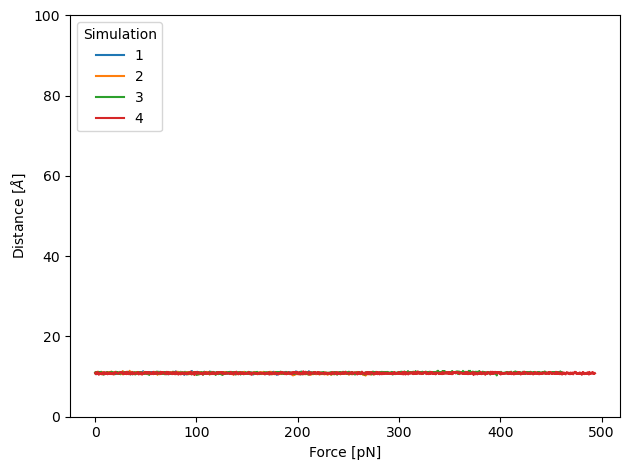

In [57]:
for key,distance in distances_pk2.items():
    end_force = ((len(distance)*movie_skip*step_interval*2)/1000000000) * gradient
    plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:], label=key)
    #plt.plot(np.linspace(start=0, stop=end_force, num=len(distances[1:])), distances[1:], label=key)

plt.legend(title='Simulation', loc=2)
#plt.title(f'Pseudo Knot 2 Distance during MD simulations', fontsize=14)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')
plt.ylim(0, 100)
save_under = os.path.join(image_folder, 'negative_pk2_distance.png')
plt.tight_layout()

plt.savefig(save_under)

# ZIKV

## GFMD

In [58]:
base_folder = '//scr/aldea/kgutenbrunner/working/MD/MBFV/ZIKA_XRay_grad_v/'
foldername = os.path.join(base_folder, 'run1000_1/')
gradient = 1000

movie_skip = 50

basedir = os.getcwd()

dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
pdb_file = base_folder + 'init.pdb'



step_start, step_interval = get_steps(foldername, gradient)


In [59]:
distances_file = os.path.join(base_folder, 'distances1000.txt')

distances_analysis = {}
with open(distances_file, 'r') as f:
    distances = None
    simulation = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_analysis[simulation] = distances
            simulation=int(line[1:-1]) +1
            distances=[]

del distances_analysis[None]
distances_analysis[simulation] = distances
force=line


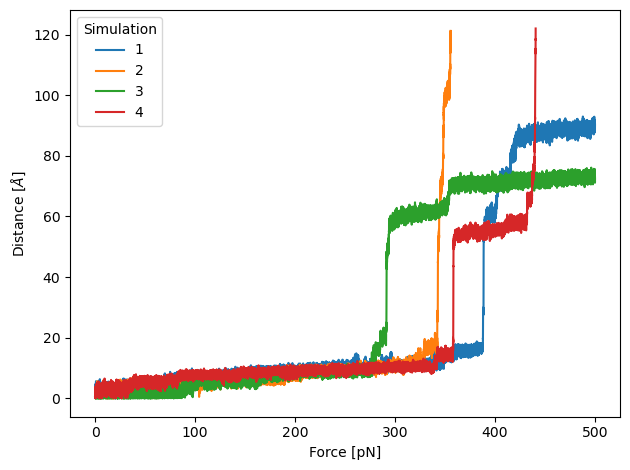

In [60]:
for key,distance in distances_analysis.items():
    end_force = ((len(distance)*step_interval*2)/1000000000) * gradient
    plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:], label=key)

plt.legend(title='Simulation', loc=0)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')

save_under = os.path.join(image_folder, 'ZIKV_grad_distances_5end.png')
plt.tight_layout()
plt.savefig(save_under)

## CFMD

In [75]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/MBFV/ZIKA_XRay_v/'
runs = ['200_1', '300_1', '350_1', '400_1', '500_1']

foldernames = [f'{base_folder}run{run}/' for run in runs]
movie_skip = 1

basedir = os.getcwd()

pdb_file = base_folder + 'init.pdb'
colors = ['b', 'g', 'r', 'c', 'm']

colors = ['#f0f9e8', '#bae4bc', '#7bccc4', '#43a2ca', '#0868ac']


In [76]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_hist = {}
with open(distances_file, 'r') as f:
    distances = None
    force = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_hist[force] = distances
            force=line[1:-3]
            distances=[]

del distances_hist[None]
distances_hist[force] = distances
force=line


/scr/aldea/kgutenbrunner/working/MD/MBFV/ZIKA_XRay_v/histogram_combined.png
/scr/aldea/kgutenbrunner/github/MA/MD/MBFV/img/ZIKV_histograms.png


''

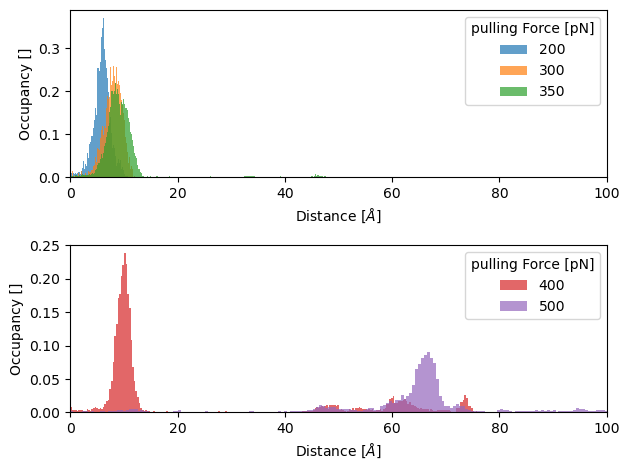

In [80]:
import matplotlib.colors as mcolors

force_A = [200, 300, 350]
force_B = [400, 500]
colors =list(mcolors.TABLEAU_COLORS.values())


fig, axs = plt.subplots(2)

i = 0
for force in force_A:
    axs[0].hist(distances_hist[str(force)], bins=250, density=True, alpha=0.7, label=force, color=colors[i])
    i+=1
#xs[0].legend(title='pulling Force [pN]')
axs[0].set_xlim(0, 100)
axs[0].set_xlabel(r'Distance [$\AA$]')
axs[0].set_ylabel('Occupancy []')

axs[0].legend(title='pulling Force [pN]')

for force in force_B:
    axs[1].hist(distances_hist[str(force)], bins=250, density=True, alpha=0.7, label=force,  color=colors[i])
    i+=1

axs[1].set_xlim(0, 100)
axs[1].set_xlabel(r'Distance [$\AA$]')
axs[1].set_ylabel('Occupancy []')
axs[1].legend(title='pulling Force [pN]')


save_under = os.path.join(base_folder, 'histogram_combined.png')
print(save_under)

fig.tight_layout()

save_under = os.path.join(image_folder, 'ZIKV_histograms.png')
print(save_under)
plt.savefig(save_under)
;

# no beta

##  GFMD

In [64]:
base_folder = '//scr/aldea/kgutenbrunner/working/MD/MBFV/no_beta_gradient/'
foldername = os.path.join(base_folder, 'run5000_1/')
gradient = 5000

movie_skip = 50

basedir = os.getcwd()

dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
pdb_file = base_folder + 'init.pdb'



step_start, step_interval = get_steps(foldername, gradient)


In [66]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_analysis = {}
with open(distances_file, 'r') as f:
    distances = None
    simulation = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_analysis[simulation] = distances
            simulation=int(line[1:-1]) +1
            distances=[]

del distances_analysis[None]
distances_analysis[simulation] = distances
force=line


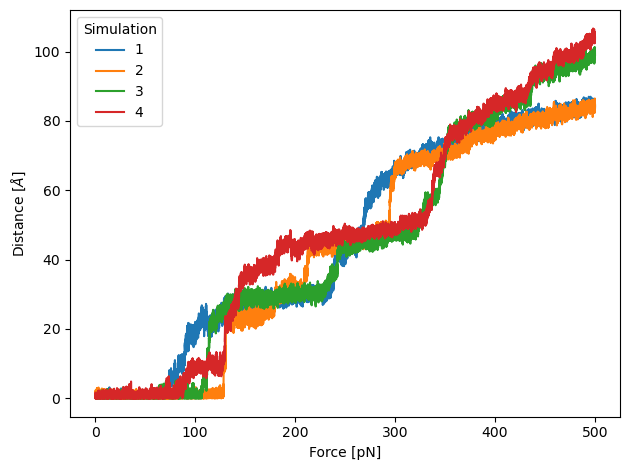

In [69]:
for key,distance in distances_analysis.items():
    end_force = ((len(distance)*step_interval*2)/1000000000) * gradient
    plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:], label=key)

plt.legend(title='Simulation', loc=0)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')

save_under = os.path.join(image_folder, 'no_beta_grad_distances_5end.png')
plt.tight_layout()
plt.savefig(save_under)

# No C - Multi constraints

## CFMD

In [90]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/MBFV/no_c_multi_constr/'
runs = ['200_1', '300_1', '350_1', '400_1', '500_1']

foldernames = [f'{base_folder}run{run}/' for run in runs]
movie_skip = 1

basedir = os.getcwd()

pdb_file = base_folder + 'init.pdb'
colors = ['b', 'g', 'r', 'c', 'm']

colors = ['#f0f9e8', '#bae4bc', '#7bccc4', '#43a2ca', '#0868ac']


In [91]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_hist = {}
with open(distances_file, 'r') as f:
    distances = None
    force = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_hist[force] = distances
            force=line[1:-3]
            distances=[]

del distances_hist[None]
distances_hist[force] = distances
force=line


/scr/aldea/kgutenbrunner/github/MA/MD/MBFV/img/no_c_multi_constr_histograms.png


''

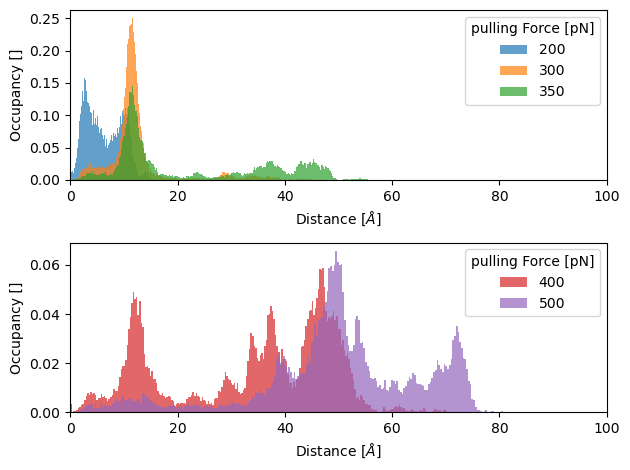

In [93]:
import matplotlib.colors as mcolors

force_A = [200, 300, 350]
force_B = [400, 500]
colors =list(mcolors.TABLEAU_COLORS.values())


fig, axs = plt.subplots(2)

i = 0
for force in force_A:
    axs[0].hist(distances_hist[str(force)], bins=250, density=True, alpha=0.7, label=force, color=colors[i])
    i+=1
#xs[0].legend(title='pulling Force [pN]')
axs[0].set_xlim(0, 100)
axs[0].set_xlabel(r'Distance [$\AA$]')
axs[0].set_ylabel('Occupancy []')

axs[0].legend(title='pulling Force [pN]')

for force in force_B:
    axs[1].hist(distances_hist[str(force)], bins=250, density=True, alpha=0.7, label=force,  color=colors[i])
    i+=1

axs[1].set_xlim(0, 100)
axs[1].set_xlabel(r'Distance [$\AA$]')
axs[1].set_ylabel('Occupancy []')
axs[1].legend(title='pulling Force [pN]')

fig.tight_layout()

save_under = os.path.join(image_folder, 'no_c_multi_constr_histograms.png')
print(save_under)
plt.savefig(save_under)
;

## GFMD

In [83]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/MBFV/no_c_multi_constr_gradient/'
foldername = os.path.join(base_folder, 'run5000_1/')
gradient = 5000

movie_skip = 50

basedir = os.getcwd()

dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
pdb_file = base_folder + 'init.pdb'



step_start, step_interval = get_steps(foldername, gradient)


In [84]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_analysis = {}
with open(distances_file, 'r') as f:
    distances = None
    simulation = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_analysis[simulation] = distances
            simulation=int(line[1:-1]) +1
            distances=[]

del distances_analysis[None]
distances_analysis[simulation] = distances
force=line


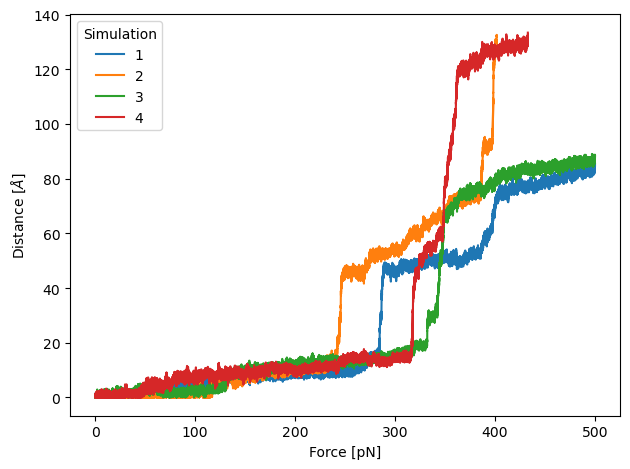

In [89]:
for key,distance in distances_analysis.items():
    end_force = ((len(distance)*step_interval*2)/1000000000) * gradient
    plt.plot(np.linspace(start=0, stop=end_force, num=len(distance[1:])), distance[1:], label=key)

plt.legend(title='Simulation', loc=2)
plt.xlabel('Force [pN]')
plt.ylabel(r'Distance [$\AA$]')

save_under = os.path.join(image_folder, 'no_c_multli_const_grad_distances_5end.png')
plt.tight_layout()
plt.savefig(save_under)

# No C - no constraints

In [94]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/MBFV/no_c_no_cons/'
runs = ['200_1', '300_1', '350_1', '400_1', '500_1']

foldernames = [f'{base_folder}run{run}/' for run in runs]
movie_skip = 1

basedir = os.getcwd()

pdb_file = base_folder + 'init.pdb'
colors = ['b', 'g', 'r', 'c', 'm']

colors = ['#f0f9e8', '#bae4bc', '#7bccc4', '#43a2ca', '#0868ac']


In [95]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_hist = {}
with open(distances_file, 'r') as f:
    distances = None
    force = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_hist[force] = distances
            force=line[1:-3]
            distances=[]

del distances_hist[None]
distances_hist[force] = distances
force=line


''

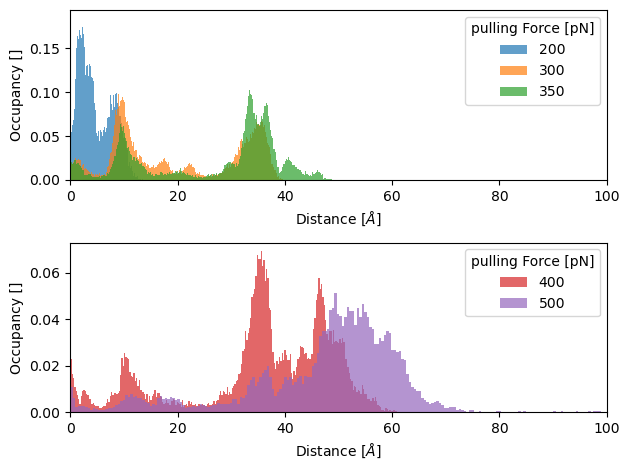

In [98]:
import matplotlib.colors as mcolors

force_A = [200, 300, 350]
force_B = [400, 500]
colors =list(mcolors.TABLEAU_COLORS.values())


fig, axs = plt.subplots(2)

i = 0
for force in force_A:
    axs[0].hist(distances_hist[str(force)], bins=250, density=True, alpha=0.7, label=force, color=colors[i])
    i+=1
#xs[0].legend(title='pulling Force [pN]')
axs[0].set_xlim(0, 100)
axs[0].set_xlabel(r'Distance [$\AA$]')
axs[0].set_ylabel('Occupancy []')

axs[0].legend(title='pulling Force [pN]')

for force in force_B:
    axs[1].hist(distances_hist[str(force)], bins=250, density=True, alpha=0.7, label=force,  color=colors[i])
    i+=1

axs[1].set_xlim(0, 100)
axs[1].set_xlabel(r'Distance [$\AA$]')
axs[1].set_ylabel('Occupancy []')
axs[1].legend(title='pulling Force [pN]')

save_under = os.path.join(image_folder, 'no_c_no_constr_hist.png')
fig.tight_layout()
plt.savefig(save_under)
;